Top 10 similar users to User 1: [773, 868, 592, 880, 429, 276, 916, 222, 457, 8]
Predicted rating for item 508 by user 1: 4.2


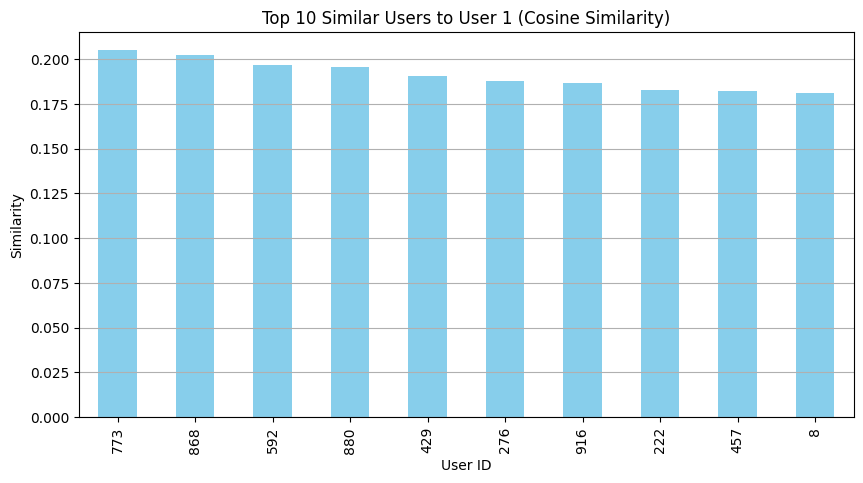

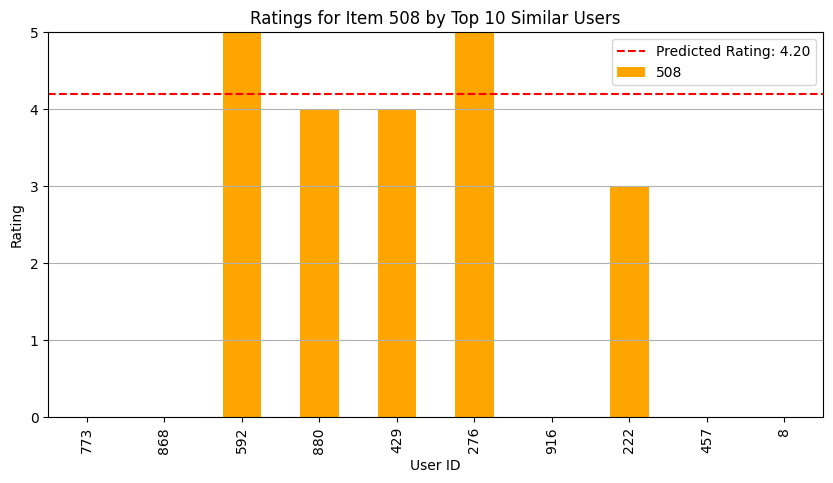

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Load rating data
ratings = pd.read_csv("ml-100k/u.data", sep="\t", names=["user_id", "item_id", "rating", "timestamp"])

# Create a user-item rating matrix
utility_matrix = ratings.pivot_table(index="user_id", columns="item_id", values="rating")

# Centralize user ratings
centered_matrix = utility_matrix.sub(utility_matrix.mean(axis=1), axis=0).fillna(0)

# Problem 1
cos_sim = cosine_similarity(centered_matrix)
sim_df = pd.DataFrame(cos_sim, index=utility_matrix.index, columns=utility_matrix.index)

top10_users = sim_df.loc[1].drop(1).nlargest(10).index
item_508_ratings = utility_matrix.loc[top10_users, 508]
predicted_rating = item_508_ratings.mean()

print("Top 10 similar users to User 1:", top10_users.tolist())
print("Predicted rating for item 508 by user 1:", round(predicted_rating, 2))

similarities = sim_df.loc[1, top10_users]
plt.figure(figsize=(10, 5))
similarities.plot(kind='bar', color='skyblue')
plt.title("Top 10 Similar Users to User 1 (Cosine Similarity)")
plt.ylabel("Similarity")
plt.xlabel("User ID")
plt.grid(axis='y')
plt.show()
plt.figure(figsize=(10, 5))
item_508_ratings.plot(kind='bar', color='orange')
plt.title("Ratings for Item 508 by Top 10 Similar Users")
plt.ylabel("Rating")
plt.xlabel("User ID")
plt.ylim(0, 5)
plt.axhline(predicted_rating, color='red', linestyle='--', label=f'Predicted Rating: {predicted_rating:.2f}')
plt.legend()
plt.grid(axis='y')
plt.show()



Cosine similarity between user 200 and movie 95: 0.2563, cosine distance: 0.7437
Cosine similarity between user 15 and movie 95: 0.0451, cosine distance: 0.9549

The recommender system will recommend the movie 95 to the user 200


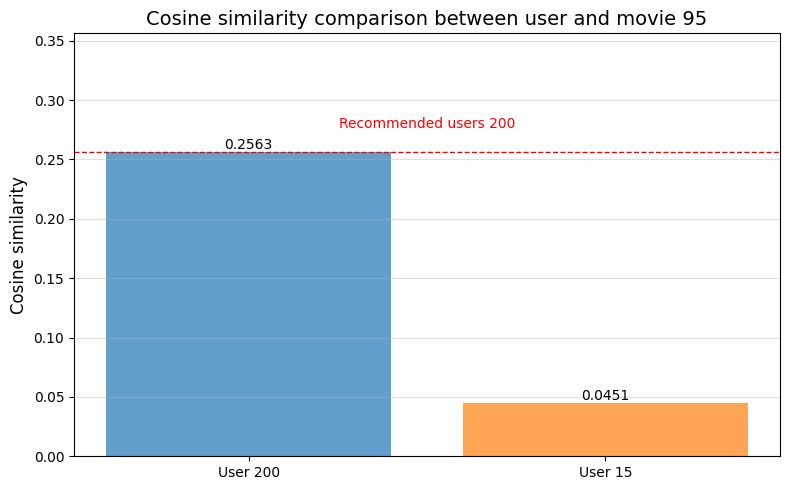

In [4]:
#  Problem 2

# Calculate the cosine similarity matrix between movies
item_similarity = cosine_similarity(centered_matrix.T)
item_sim_df = pd.DataFrame(
    item_similarity,
    index=centered_matrix.columns,  
    columns=centered_matrix.columns
)

# Get the similarity vector of movie 95
movie_95_sim = item_sim_df[95]

# Extract the centralized rating vectors of users 200 and 15
user_200_profile = centered_matrix.loc[200]
user_15_profile = centered_matrix.loc[15]

# Calculate the cosine similarity between the user portrait and the movie 95 similarity vector
cos_sim_200 = cosine_similarity([user_200_profile], [movie_95_sim])[0][0]
cos_sim_15 = cosine_similarity([user_15_profile], [movie_95_sim])[0][0]

# Calculate cosine distance
cos_distance_200 = 1 - cos_sim_200
cos_distance_15 = 1 - cos_sim_15

print(f"Cosine similarity between user 200 and movie 95: {cos_sim_200:.4f}, cosine distance: {cos_distance_200:.4f}")
print(f"Cosine similarity between user 15 and movie 95: {cos_sim_15:.4f}, cosine distance: {cos_distance_15:.4f}")

# Determine the recommended object based on similarity
recommended_user = 200 if cos_sim_200 > cos_sim_15 else 15
print(f"\nThe recommender system will recommend the movie 95 to the user {recommended_user}")

plt.figure(figsize=(8, 5))
users = ["User 200", "User 15"]
cos_sims = [cos_sim_200, cos_sim_15]
colors = ["#1f77b4", "#ff7f0e"] 
bars = plt.bar(users, cos_sims, color=colors, alpha=0.7)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f"{height:.4f}",
             ha="center", va="bottom")
max_sim = max(cos_sims)
plt.axhline(y=max_sim, color="red", linestyle="--", linewidth=1)
plt.text(0.5, max_sim + 0.02, f"Recommended users {recommended_user}",
         ha="center", color="red")
plt.title("Cosine similarity comparison between user and movie 95", fontsize=14)
plt.ylabel("Cosine similarity", fontsize=12)
plt.ylim(0, max(cos_sims) + 0.1)  
plt.grid(axis="y", alpha=0.4)
plt.tight_layout()
plt.show()
